## Backpropagation

### Part I. Classic

In [1]:
import numpy as np
from IPython.display import Image
import matplotlib as plt
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Do a forward pass (calculate green values), and a backward pass (calculate gradients, red
values).

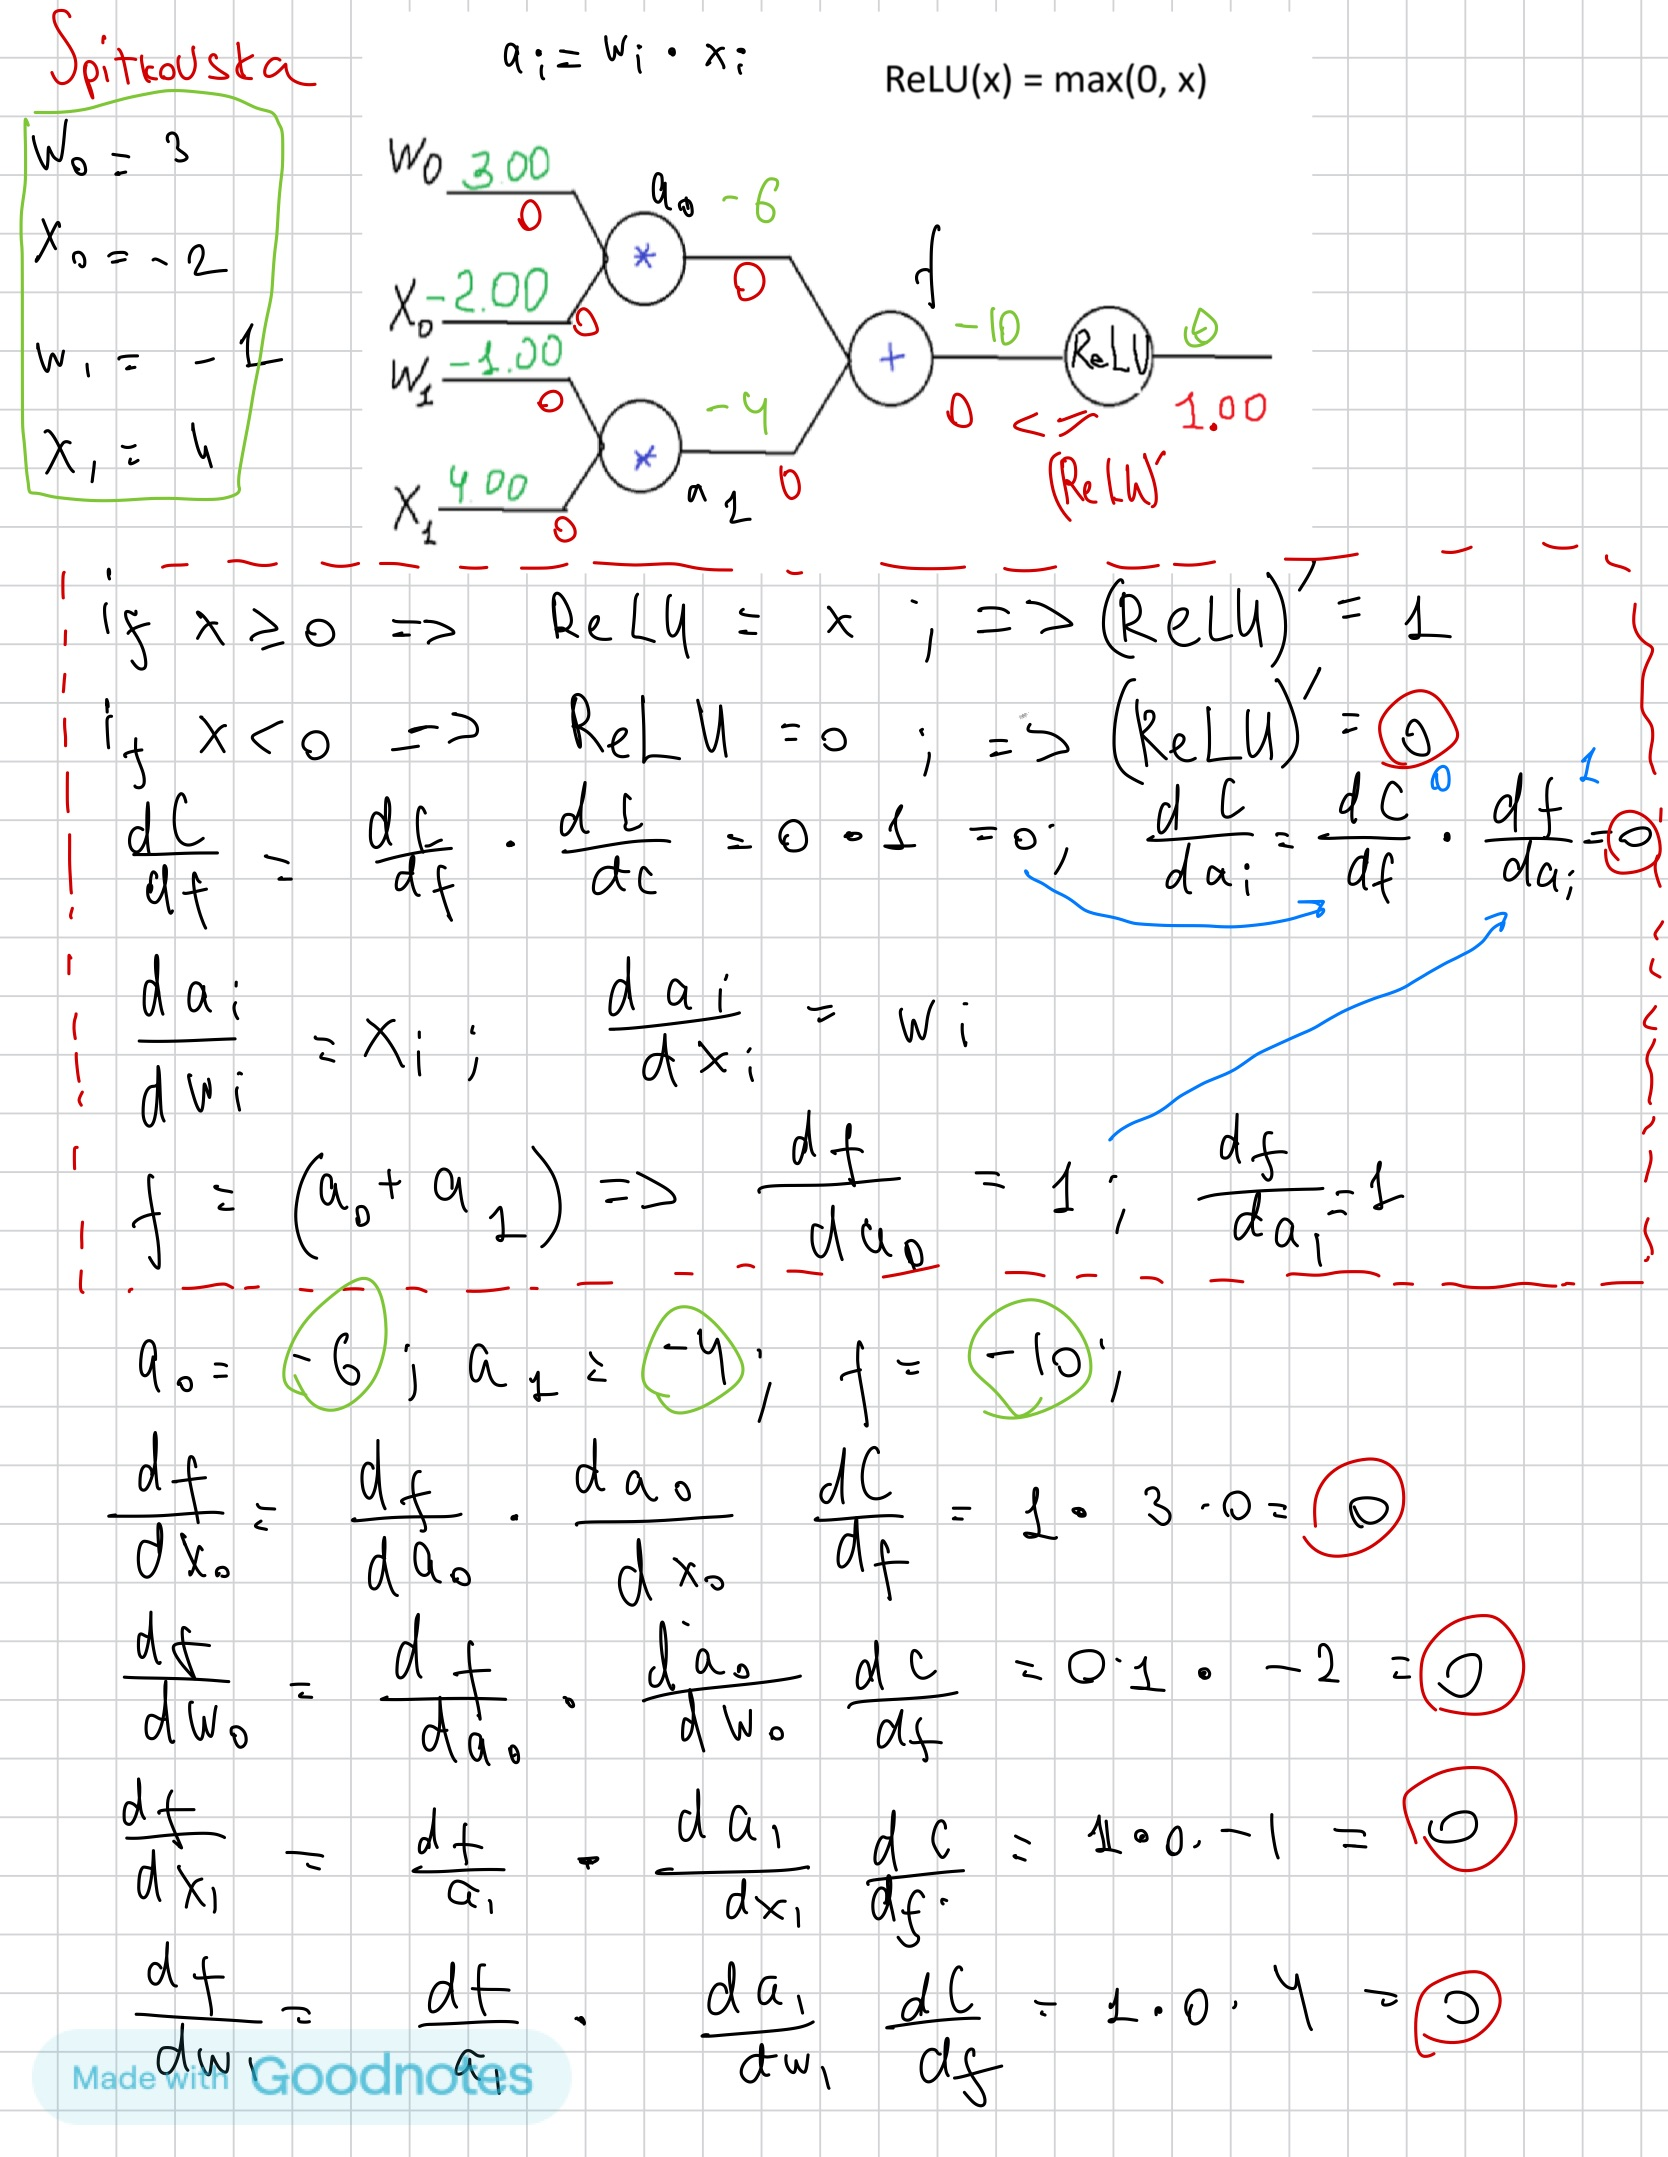

In [2]:
Image(filename='Spitkovska_HW4_Task1.jpeg')

### Part II. Some coding bits

In [33]:
def affine(x, w, b):
    return w * x + b
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))
def gaussian(x):
    return np.exp(-x*x)
def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))
def mse(y,yout):
    return np.mean((y-yout)*(y-yout))

firstly let's look closer at the mse functiom and z (which is equal to wi*xi + bi)

and also, MSE is our cost function here. Let's have a look:

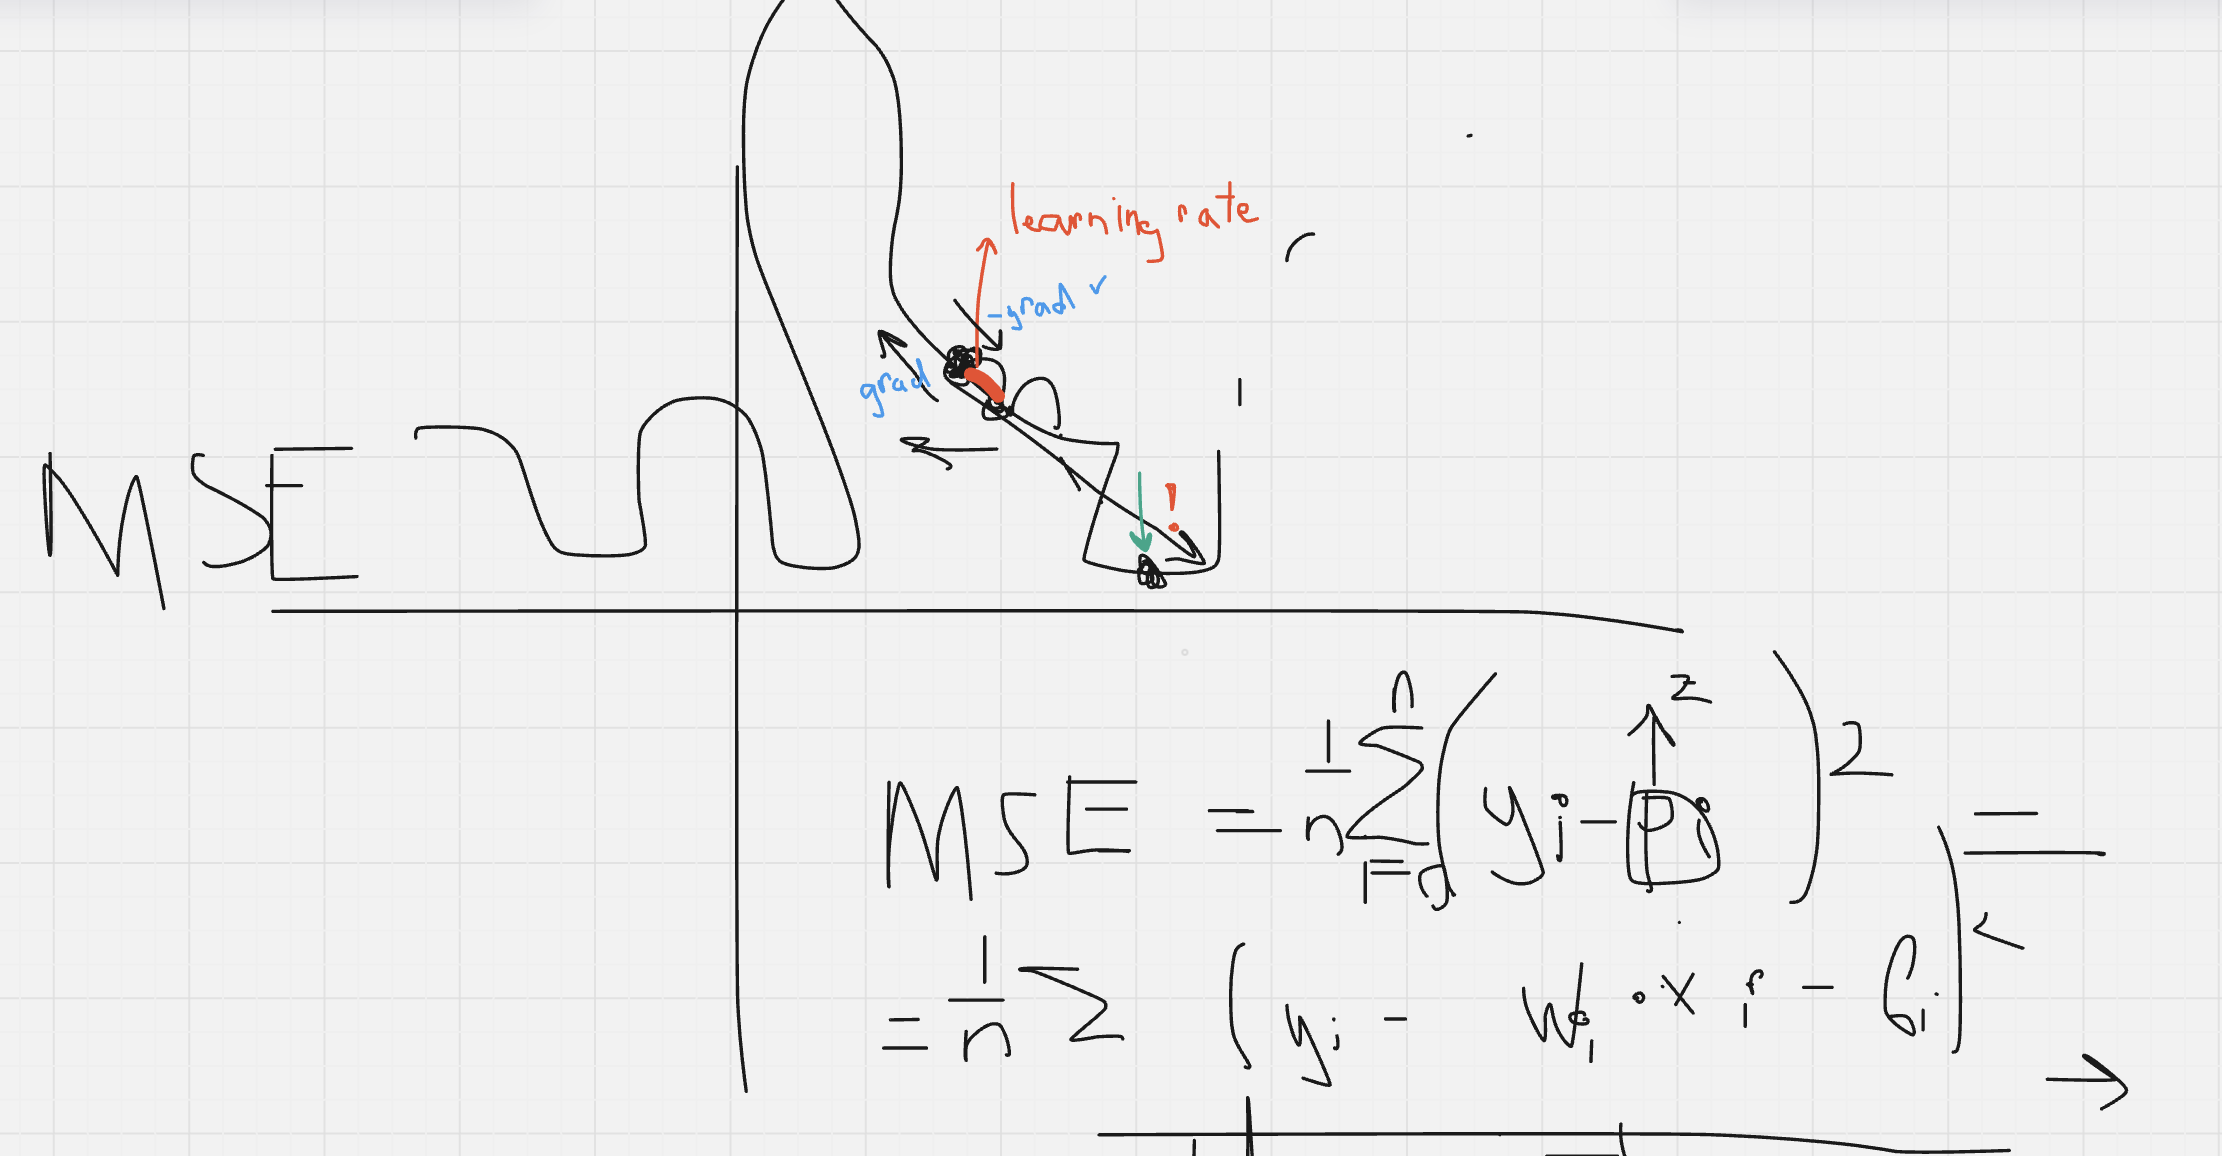

In [2]:
Image(filename='error_min.png')

i'll add 2 funcs for partial derivative calculation for weitght and bias according to the formula. i`ll show how the functions are connected with mse and partial derivatives:

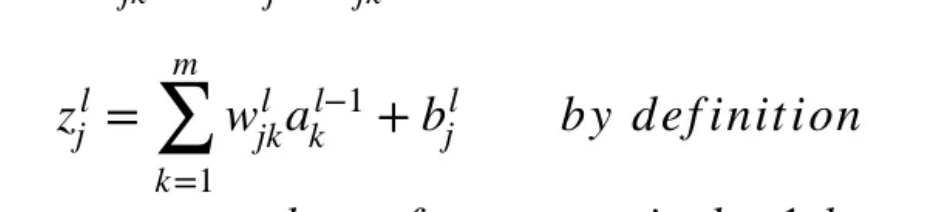

In [35]:
Image(filename='sum_of_lins.png')

from where partial diff for weight (dz/dw) == -2/n * Sum((yi - w*xi + b)*xi)

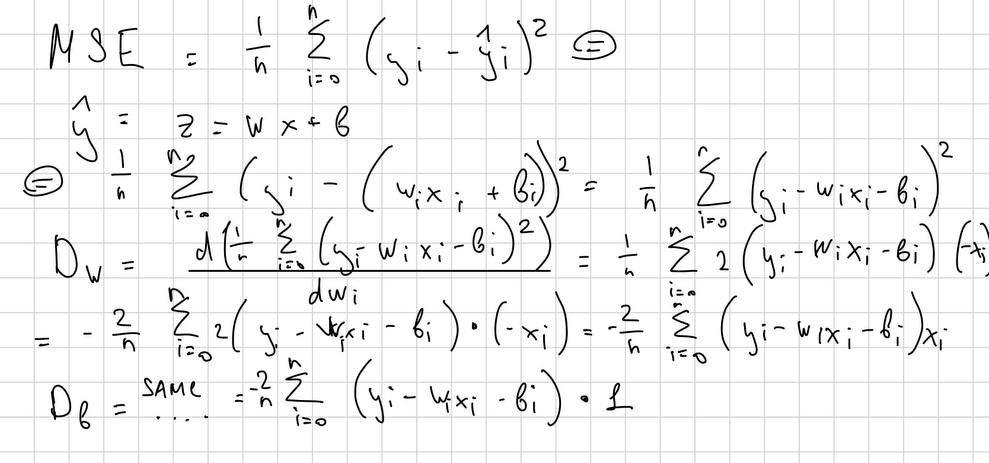

In [3]:
Image(filename='mse_dw_db.jpeg')

dz/db will be -2/n Sum {from i=0 to n of}(yi - w*xi + b). xi is absent hear because z = w*x + b(no coeff near b)
therefore:

In [37]:
def derivative_weight(x, y, w, b):
    return -(2 / len(x)) * np.sum((y-np.sum((w*x+b), axis=1)).reshape(-1, 1)*x, axis=0)
def derivative_bias(x, y, w, b):
    return -(2 / len(x)) * np.sum((y-np.sum((w*x+b), axis=1)).reshape(-1, 1), axis=0)

In [38]:
# here i just tested how it works
# x = np.array([[1,8], [5,6]])
# w = np.array ([2,4])
# b = np.array([1,2])
# y = np.array([1, 3])
# dwt = derivative_weight(x, y, w, b)
# dbt = derivative_bias(x, y, w, b)
#print(dwt, dbt)

In [39]:
x = 1.

##### initialization

w_1 = np.array([1., -1.])
b_1 = np.array([1., 1.])

w_2 = np.array([1., -1.])
b_2 = np.array([1.])

In [40]:
### do the forward pass of the network
z_2, z_3, h_1_2 = 0, 0, 0


def forward():
    global z_2, z_3, h_1_2
    z_2 = affine(x, w_1, b_1)
    h_1_2 = sigmoid(z_2)

    # Second layer
    z_3 = np.dot(w_2, h_1_2) + b_2
    h_2 = sigmoid(z_3)


forward()
print(z_2, z_3)

[2. 0.] [1.38079708]


In [41]:
# calculating mse
loss = mse(z_3, gaussian(x))
print(loss)

1.0260021389535428


* Is the output of the network close to the actual value?
according to the mse results - it is close. let's try to make it even closer!

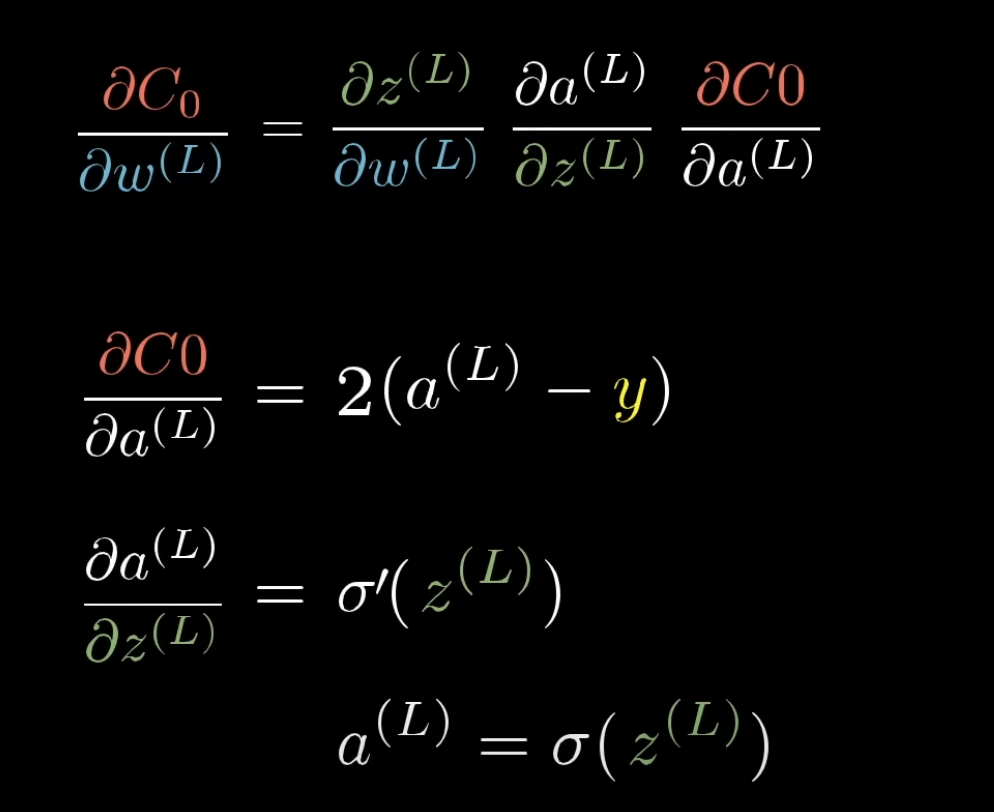

In [42]:
Image(filename='formulas_backprop.png')

In [43]:
#### DERIVATIVES CALCULATION
### calculating partial derivs and da_2 having a fosmulas
dw_2 = derivative_weight(np.array([h_1_2]), np.array([gaussian(x)]), w_2, b_2)
db_2 = derivative_bias(np.array([h_1_2]), np.array([gaussian(x)]), w_2, b_2)
da_2 = w_2*db_2
dw_2, db_2, da_2

(array([3.54594395, 2.01291764]),
 array([4.02583527]),
 array([ 4.02583527, -4.02583527]))

In [44]:
# formula from upper screen dC/dw2 * dw2/da * da/dz2
#unused in this code tho :(
print(dw_2[0]*sigmoid_derivative(z_2[0]))
print(dw_2[1]*sigmoid_derivative(z_2[1]))
print(dw_2 * sigmoid_derivative(z_2))

0.3723013684693458
0.50322940920161
[0.37230137 0.50322941]


now we can finally get a dw1, db1 values using this formulas:

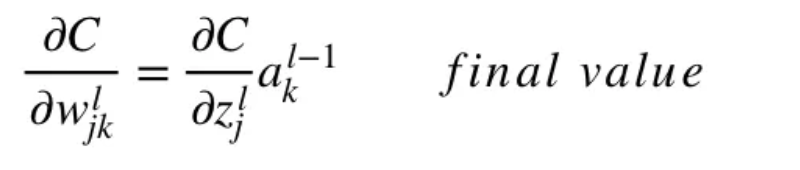

In [45]:
Image(filename='dw1.png')

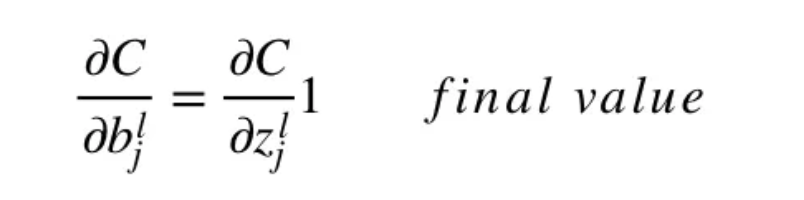

In [46]:
Image(filename='db1.png')

coefficient ak is our x (partial deriv by w from z = (wi*xi + bi)' = xi
coefficient 1 is  from : partial deriv by b from z = (wi*xi + bi)' = 1

In [47]:
dw_1 = da_2*sigmoid_derivative(z_2)*x
db_1 = da_2*sigmoid_derivative(z_2)*1
dw_1, dw_2

(array([ 0.42268688, -1.00645882]), array([3.54594395, 2.01291764]))

In [48]:
##### WEIGHTS UPDATE
### enter your code here
# as lr = 1 (you told it in our telegram group).
lr1 = 1
w_1 -= dw_1*lr1
w_2 -= dw_2*lr1

b_1 -= db_1*lr1
b_2 -= db_2*lr1
w_1, w_2, b_1, b_2

(array([0.57731312, 0.00645882]),
 array([-2.54594395, -3.01291764]),
 array([0.57731312, 2.00645882]),
 array([-3.02583527]))

In [49]:
### do again the forward pass of the network

forward()
loss = mse(z_3, gaussian(x))
print(loss)

63.798095457372774


Did output become closer to the actual value of the function?

nope. due to the big learning rate value it became bigger. what if lr would be 0.001 instead? let's check

In [50]:
#reinitialize
w_1 = np.array([1., -1.])
b_1 = np.array([1., 1.])

w_2 = np.array([1., -1.])
b_2 = np.array([1.])

lr2 = 0.001
w_1 -= dw_1*lr2
w_2 -= dw_2*lr2

b_1 -= db_1*lr2
b_2 -= db_2*lr2
w_1, w_2, b_1, b_2

(array([ 0.99957731, -0.99899354]),
 array([ 0.99645406, -1.00201292]),
 array([0.99957731, 1.00100646]),
 array([0.99597416]))

In [51]:
forward()
loss = mse(z_3, gaussian(x))
print(loss)

1.008356125426984


here we are! we reduced mse value even more with correct lr value.
accuracies
was: 1.0260021389535428
now:1.008356125426984

### wrap things in to a loop

In [52]:
N = 50000
lr = 0.01

In [53]:
X = np.linspace(-5.0, 5.0, 500)

##### initialization

w_1 = np.array([1., -1.])
b_1 = np.array([1., 1.])

w_2 = np.array([1., -1.])
b_2 = np.array([1.])


for i in range(N):
    x = np.random.choice(X)
    actual = gaussian(x)
    #### FORWARD PASS
    forward()

    #### DERIVATIVES CALCULATION
    dw_2 = derivative_weight(np.array([h_1_2]), np.array([gaussian(x)]), w_2, b_2)
    db_2 = derivative_bias(np.array([h_1_2]), np.array([gaussian(x)]), w_2, b_2)
    da_2 = w_2*db_2

    dw_1 = da_2*sigmoid_derivative(z_2)*x
    db_1 = da_2*sigmoid_derivative(z_2)*1

    ##### WEIGHTS UPDATE
    w_1 -= dw_1*lr
    w_2 -= dw_2*lr

    b_1 -= db_1*lr
    b_2 -= db_2*lr

In [54]:
loss = mse(z_3, gaussian(x))
print(loss)

9.987375366915554e-05


Now let's plot things and see what they look like.

In [56]:
# doing similar things but now we have multiple values for x so we remember it using funcs in code
z1 = [affine(x, w_1[0], b_1[0]) for x in X]
z2 = [affine(x, w_1[1], b_1[1]) for x in X]

h1 = [sigmoid(z1) for z1 in z1]
h2 = [sigmoid(z2) for z2 in z2]

z3 = [w_2[0] * h1 + w_2[1] * h2 + b_2[0] for h1, h2 in zip(h1, h2)]
out = z3  # 'out' is the same as 'Z3' here as we see :)

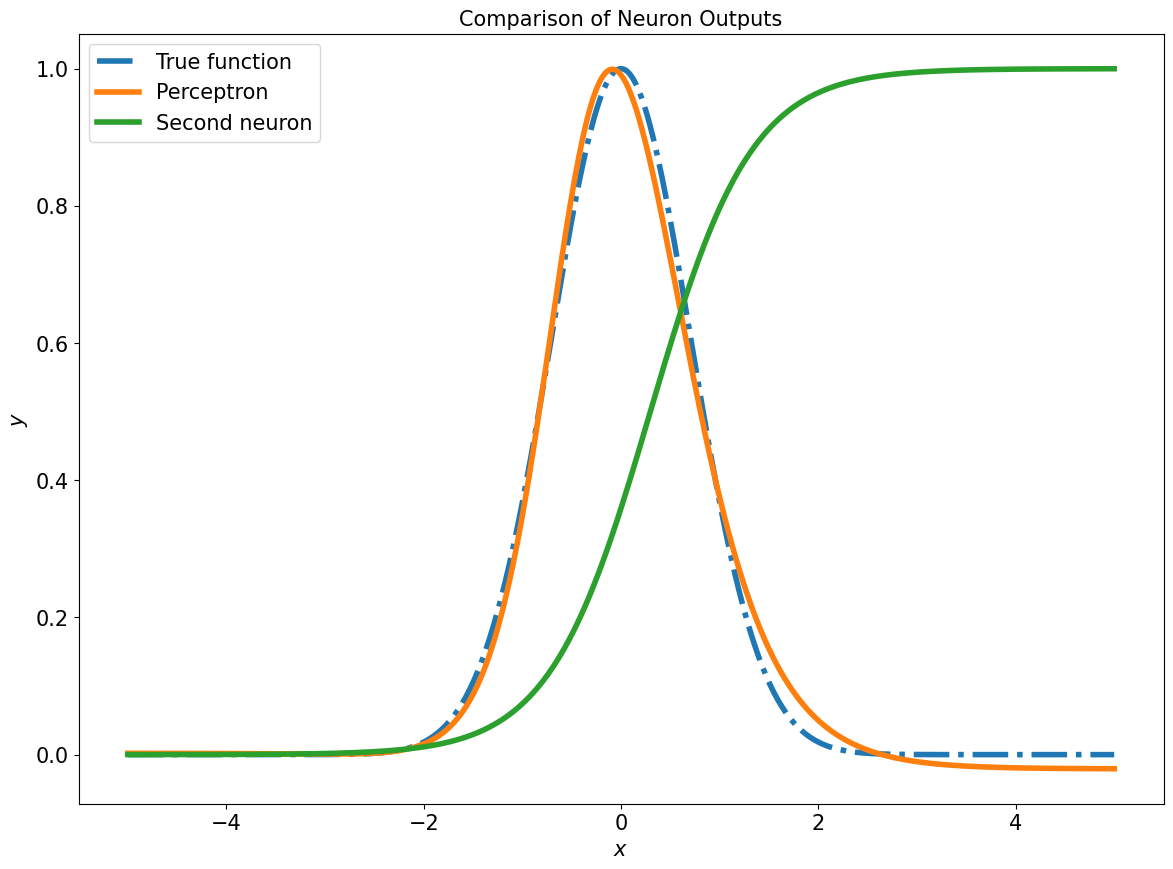

In [59]:
import matplotlib.pyplot as plt

SIZE = 15

# Correct usage of subplots
fig, ax = plt.subplots(1, 1, figsize=(14, 10))

ax.plot(X, gaussian(X), lw=4, ls='-.', label='True function')
ax.plot(X, out, lw=4, label='Perceptron')
ax.plot(X, h2, lw=4, label='Second neuron')   # Uncomment when ready

# Set title
ax.set_title('Comparison of Neuron Outputs', fontsize=SIZE)


# Create labels (very important!)

ax.set_xlabel('$x$', fontsize=SIZE)# Notice we make the labels big enough to read
ax.set_ylabel('$y$', fontsize=SIZE)

ax.tick_params(labelsize=SIZE) # Make the tick labels big enough to read

# Create a legend and make it big enough to read
ax.legend(fontsize=SIZE, loc='best')
# Show the plot
plt.show()

now the graph shows that the neural network has learned to approximate the Gaussian function. The network’s output aligns well with the true function , which means the network trained successfully. The activation of the second neuron (green line) highlights how each neuron responds differently to the input values, working together to produce the final output.

### Classification problem

Fill out the code for the following classification problem. Implement:
- foward pass
- backward pass
- weight updates

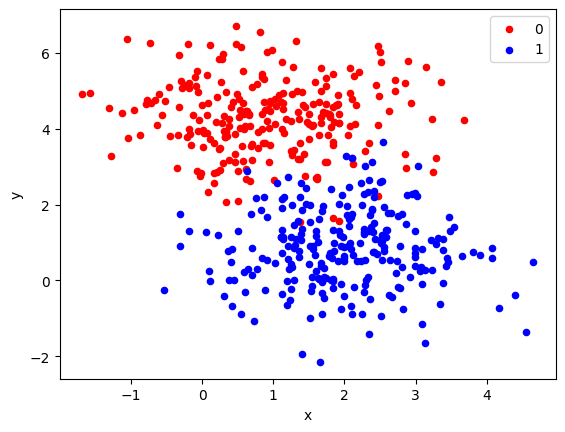

In [60]:
# generate 2d classification dataset
X, y = make_blobs(n_samples=500, centers=2, n_features=2, random_state=0)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

In [62]:
x = X_test

In [63]:
##### initialization ('ones')
w_1 = np.array([1, 1])
b_1 = np.array([1])

In [64]:
#same steps
z1 = np.array([affine(x, w_1, b_1) for x in X_test])
# Node outputs
h1 = sigmoid(np.sum(z1, axis=1))
# h1, z1

### Check the accuracy

In [65]:
pred = [int(score > 0.5) for score in h1]
print("Accuracy: ", sum(pred == y_test) / len(y_test))

Accuracy:  0.45


### generalization ==> wrap into a proper loop

In [66]:
### Loop

In [67]:
N = 10000 # epochs

In [68]:
from sklearn.metrics import log_loss

batch_size = 10 # 2, 4, 8, 16, 32, ... 10 is also an example

##### initialization

w_1 = np.array([1.,1.])
b_1 = np.array([1.])
tolerance = 1e-6
prev_loss = float('inf')

for i in range(N):
    perm = np.random.permutation(len(X_train))
    X_train = X_train[perm]
    y_train = y_train[perm]

    for batch_id in range(int(len(X_train) / batch_size)):
        x = X_train[batch_id * batch_size:(batch_id + 1) * batch_size]
        y = y_train[batch_id * batch_size:(batch_id + 1) * batch_size]

        m = x.shape[0]

        #### Forward Pass
        z_1 = np.dot(x, w_1) + b_1
        h_1 = sigmoid(z_1)

        #### Log Loss Calculation
        loss = log_loss(y, h_1, labels=[0, 1])

        #### Check Convergence
        if abs(prev_loss - loss) < tolerance:
            print(f"Converged at epoch {i}, batch {batch_id}, with loss {loss:.6f}")
            break

        prev_loss = loss

        #### Derivatives Calculation
        dz1 = h_1 - y
        dw1 = (1 / m) * np.dot(x.T, dz1)
        db1 = (1 / m) * np.sum(dz1)

        ##### Weights Update
        w_1 -= dw1 * lr
        b_1 -= db1 * lr

    if i % 1000 == 0:  # Print progress
        print(f"Epoch {i}, Loss: {loss:.6f}")

Epoch 0, Loss: 1.419076
Epoch 1000, Loss: 0.117631
Epoch 2000, Loss: 0.028721
Epoch 3000, Loss: 0.023271
Converged at epoch 3931, batch 33, with loss 0.007568
Epoch 4000, Loss: 0.086168
Epoch 5000, Loss: 0.024489
Converged at epoch 5507, batch 29, with loss 0.010735
Epoch 6000, Loss: 0.239180
Epoch 7000, Loss: 0.013210
Epoch 8000, Loss: 0.059643
Epoch 9000, Loss: 0.016179
Converged at epoch 9954, batch 17, with loss 0.004280


In [69]:
### check the accuracy on the test set
y_pred = sigmoid(X_test @ w_1 + b_1)
accuracy_score(y_test, y_pred > 0.5)

0.95

now, as we can tell, the model achieved nice performance (from 0.45 to 0.95 accuracy!) and demonstrated the effectiveness of gradient-based optimization for binary classification task

The prevailing part of work was made by me during the documentation researches and understanding of math. Backpropagation is a very interesting method of gradient detection to reduce the error in the neural net, but at the same time it's very challenging and complex.
The greate thing is, that when i ended with the Part || of this notebook, the hardest part was already done (as for me).
